In [1]:
!git clone https://github.com/hungvotranchi/ComputerVision.git

Cloning into 'ComputerVision'...
remote: Enumerating objects: 169, done.
remote: Counting objects: 100% (169/169), done.
remote: Compressing objects: 100% (114/114), done.
remote: Total 169 (delta 62), reused 153 (delta 49), pack-reused 0
Receiving objects: 100% (169/169), 5.25 MiB | 13.25 MiB/s, done.
Resolving deltas: 100% (62/62), done.


In [2]:
import os
os.chdir("ComputerVision/ImageClassification")
!sh scripts/download.sh
os.chdir("model")

--2024-03-11 17:14:41--  https://www.robots.ox.ac.uk/~vgg/data/fgvc-aircraft/archives/fgvc-aircraft-2013b.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2753340328 (2.6G) [application/x-gzip]
Saving to: 'fgvc-aircraft-2013b.tar.gz'

fgvc-aircraft-2013b 100%[===================>]   2.56G  20.9MB/s    in 2m 11s  

2024-03-11 17:16:53 (20.1 MB/s) - 'fgvc-aircraft-2013b.tar.gz' saved [2753340328/2753340328]

fgvc-aircraft-2013b/
fgvc-aircraft-2013b/vl_tpfp.m
fgvc-aircraft-2013b/README.md
fgvc-aircraft-2013b/example_evaluation.m
fgvc-aircraft-2013b/README.html
fgvc-aircraft-2013b/vl_roc.m
fgvc-aircraft-2013b/vl_pr.m
fgvc-aircraft-2013b/vl_argparse.m
fgvc-aircraft-2013b/evaluation.m
fgvc-aircraft-2013b/data/
fgvc-aircraft-2013b/data/images_test.txt
fgvc-aircraft-2013b/data/images_train.txt
fgvc-aircraft-2013b/data/images_manu

In [3]:
import torch
import torchvision
import torch.optim as optim
import torch.nn as nn


import sys
sys.path.append("..")
from src.load_data import load_fgvc
from src.preprocess import transform_VGGModel
from src.plotting import imshow
from model.Inception import InceptionNet
from src.train_predict import train, test_classification

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [5]:
batch_size = 256

train_set, test_set = load_fgvc(transform_VGGModel())
train_dataloader = torch.utils.data.DataLoader(train_set, batch_size = batch_size, \
                                               shuffle = True, num_workers = 2)
test_dataloader = torch.utils.data.DataLoader(test_set, batch_size = batch_size, \
                                               shuffle = True, num_workers = 2)

In [6]:
classes = train_set.classes

In [7]:
classes

['707-320',
 '727-200',
 '737-200',
 '737-300',
 '737-400',
 '737-500',
 '737-600',
 '737-700',
 '737-800',
 '737-900',
 '747-100',
 '747-200',
 '747-300',
 '747-400',
 '757-200',
 '757-300',
 '767-200',
 '767-300',
 '767-400',
 '777-200',
 '777-300',
 'A300B4',
 'A310',
 'A318',
 'A319',
 'A320',
 'A321',
 'A330-200',
 'A330-300',
 'A340-200',
 'A340-300',
 'A340-500',
 'A340-600',
 'A380',
 'ATR-42',
 'ATR-72',
 'An-12',
 'BAE 146-200',
 'BAE 146-300',
 'BAE-125',
 'Beechcraft 1900',
 'Boeing 717',
 'C-130',
 'C-47',
 'CRJ-200',
 'CRJ-700',
 'CRJ-900',
 'Cessna 172',
 'Cessna 208',
 'Cessna 525',
 'Cessna 560',
 'Challenger 600',
 'DC-10',
 'DC-3',
 'DC-6',
 'DC-8',
 'DC-9-30',
 'DH-82',
 'DHC-1',
 'DHC-6',
 'DHC-8-100',
 'DHC-8-300',
 'DR-400',
 'Dornier 328',
 'E-170',
 'E-190',
 'E-195',
 'EMB-120',
 'ERJ 135',
 'ERJ 145',
 'Embraer Legacy 600',
 'Eurofighter Typhoon',
 'F-16A/B',
 'F/A-18',
 'Falcon 2000',
 'Falcon 900',
 'Fokker 100',
 'Fokker 50',
 'Fokker 70',
 'Global Express

Training

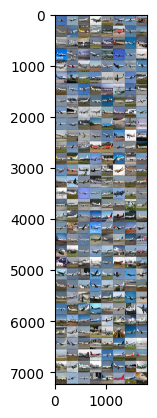

<generator object <genexpr> at 0x7b8c3903fa00>


In [8]:
dataiter = iter(train_dataloader)
img, labels = next(dataiter)

imshow(torchvision.utils.make_grid(img))
print(" ".join(f'{classes[labels[j]]}') for j in range(batch_size))


In [9]:
img.shape

torch.Size([256, 3, 224, 224])

In [10]:

model = InceptionNet(num_classes= len(classes))

model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [11]:
!pip install torchsummary
from torchsummary import summary
summary(model, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,472
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5          [-1, 192, 56, 56]         110,784
       BatchNorm2d-6          [-1, 192, 56, 56]             384
              ReLU-7          [-1, 192, 56, 56]               0
         MaxPool2d-8          [-1, 192, 28, 28]               0
            Conv2d-9           [-1, 64, 28, 28]          12,352
      BatchNorm2d-10           [-1, 64, 28, 28]             128
             ReLU-11           [-1, 64, 28, 28]               0
           Conv2d-12           [-1, 96, 28, 28]          18,528
      BatchNorm2d-13           [-1, 96, 28, 28]             192
             ReLU-14           [-1, 96,

In [12]:
train(num_loops= 20, criterion= criterion, optim= optimizer, model= model, \
      train_dataloader= train_dataloader, device= device, path = "Inception_fgcvAircraft.pth")
del model

Finished Training


Testing

In [13]:
model_pred = InceptionNet(num_classes= len(classes))
model_pred.load_state_dict(torch.load("Inception_fgcvAircraft.pth"))

<All keys matched successfully>

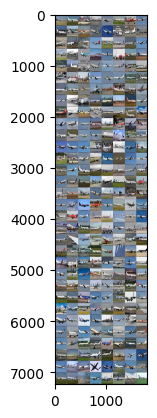

Ground truth:  Global Express 737-400 Beechcraft 1900 CRJ-200 Gulfstream V 737-300 DHC-1 A340-300 Cessna 525 Il-76 A330-300 737-700 Cessna 208 Fokker 50 ATR-42 EMB-120 707-320 737-600 Global Express A330-200 DHC-1 757-300 CRJ-700 A330-200 F/A-18 C-47 Fokker 70 DC-9-30 DHC-8-300 737-300 767-300 DC-10 A320 DC-10 DC-9-30 767-400 DHC-8-300 CRJ-200 DC-10 Cessna 560 Beechcraft 1900 737-600 DC-10 A340-200 A380 E-190 Yak-42 A380 747-300 767-300 A340-500 Eurofighter Typhoon Global Express Dornier 328 A330-200 An-12 A340-600 DC-8 A340-600 A321 767-300 DC-9-30 A310 747-200 A320 PA-28 A321 Tu-134 757-300 ERJ 145 737-600 DC-6 DC-10 BAE 146-300 Gulfstream IV ATR-72 F/A-18 DHC-1 A340-300 MD-11 A318 BAE-125 Gulfstream IV 757-300 767-400 ERJ 135 F/A-18 DHC-6 767-200 Falcon 2000 EMB-120 Cessna 525 Fokker 70 DC-3 737-500 Fokker 50 Cessna 172 Beechcraft 1900 A318 PA-28 BAE 146-200 An-12 777-300 Saab 2000 757-300 Global Express 737-600 Embraer Legacy 600 PA-28 Falcon 2000 CRJ-200 A380 A340-500 767-400 A340

In [14]:
dataiter = iter(test_dataloader)
img, labels = next(dataiter)
_, predicts = torch.max(model_pred(img), 1)


imshow(torchvision.utils.make_grid(img))
print("Ground truth: ", " ".join(f"{classes[labels[j]]}" for j in range(batch_size)))
print("Predict: ", " ".join(f"{classes[predicts[j]]}" for j in range(batch_size)))


In [15]:
test_classification(model= model_pred, test_dataloader= test_dataloader, \
                    device= device, classes= classes)
del model_pred

Accuracy of the network in the test dataset: 5 %
Accuracy for class 707-320: 3.0303030303030303
Accuracy for class 727-200: 0.0
Accuracy for class 737-200: 0.0
Accuracy for class 737-300: 0.0
Accuracy for class 737-400: 8.823529411764707
Accuracy for class 737-500: 0.0
Accuracy for class 737-600: 0.0
Accuracy for class 737-700: 0.0
Accuracy for class 737-800: 0.0
Accuracy for class 737-900: 0.0
Accuracy for class 747-100: 8.823529411764707
Accuracy for class 747-200: 0.0
Accuracy for class 747-300: 0.0
Accuracy for class 747-400: 0.0
Accuracy for class 757-200: 3.0303030303030303
Accuracy for class 757-300: 6.0606060606060606
Accuracy for class 767-200: 0.0
Accuracy for class 767-300: 0.0
Accuracy for class 767-400: 3.0303030303030303
Accuracy for class 777-200: 8.823529411764707
Accuracy for class 777-300: 0.0
Accuracy for class A300B4: 3.0303030303030303
Accuracy for class A310: 0.0
Accuracy for class A318: 3.0303030303030303
Accuracy for class A319: 0.0
Accuracy for class A320: 0.0


Loading from pretrained

In [16]:
len(classes)

100

In [17]:
models_pretrained = torch.hub.load('pytorch/vision:v0.10.0', 'googlenet', pretrained=True)

    
models_pretrained.fc.out_features = len(classes)  # Get the number of input features of the first layer

# Check the modified model architecture
print(models_pretrained)

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth
100%|██████████| 49.7M/49.7M [00:00<00:00, 112MB/s] 


GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [18]:
import gc
# Collect garbage
gc.collect()

# Additionally, for CUDA, you can empty the cache to free unused memory
torch.cuda.empty_cache()

In [19]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(models_pretrained.parameters(), lr=0.001, momentum=0.9)

models_pretrained.to(device)

train(num_loops= 100, criterion= criterion, optim= optimizer, model= models_pretrained, \
      train_dataloader= train_dataloader, device= device, path = "Inception_fgcvAircraft.pth")


Finished Training


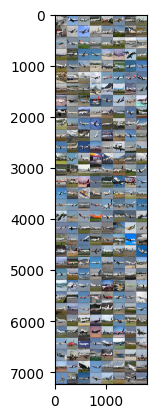

Ground truth:  C-47 Challenger 600 Saab 2000 E-190 DC-3 Challenger 600 MD-90 Eurofighter Typhoon DR-400 747-100 747-400 Saab 340 737-400 737-900 Cessna 525 737-500 Fokker 70 737-500 BAE 146-300 A340-500 737-400 Cessna 172 DC-8 A320 PA-28 PA-28 A330-200 767-400 Tornado ERJ 145 Dornier 328 737-700 DC-8 Yak-42 A330-300 767-300 L-1011 Yak-42 Dornier 328 A330-200 DHC-6 A320 Cessna 172 MD-87 A319 A320 A319 737-600 777-300 MD-80 ATR-72 F/A-18 BAE-125 747-400 L-1011 737-400 Tu-134 A340-500 737-300 DHC-6 757-200 737-600 Beechcraft 1900 DHC-6 PA-28 Boeing 717 737-700 757-300 BAE 146-200 Embraer Legacy 600 Cessna 525 ERJ 135 Tornado C-130 Gulfstream IV 747-400 CRJ-900 PA-28 C-47 Falcon 900 A318 Global Express SR-20 A340-600 MD-87 Il-76 767-200 DC-8 CRJ-900 737-300 Saab 340 DC-9-30 DC-10 Challenger 600 Boeing 717 Yak-42 Spitfire 767-300 A319 A340-300 MD-80 Saab 340 Challenger 600 A318 E-190 Cessna 172 ERJ 145 E-195 DC-10 E-170 C-47 737-600 DHC-1 DHC-1 747-300 A340-600 ERJ 135 A318 DH-82 A340-200 E

In [20]:
model_pred = models_pretrained
model_pred.load_state_dict(torch.load("Inception_fgcvAircraft.pth"))
del models_pretrained
dataiter = iter(test_dataloader)
img, labels = next(dataiter)
model_pred.to('cpu')
_, predicts = torch.max(model_pred(img), 1)


imshow(torchvision.utils.make_grid(img))
print("Ground truth: ", " ".join(f"{classes[labels[j]]}" for j in range(batch_size)))
print("Predict: ", " ".join(f"{classes[predicts[j]]}" for j in range(batch_size)))


In [21]:
model_pred.to(device)
test_classification(model= model_pred, test_dataloader= test_dataloader, \
                    device= device, classes= classes)
del model_pred

Accuracy of the network in the test dataset: 30 %
Accuracy for class 707-320: 6.0606060606060606
Accuracy for class 727-200: 5.882352941176471
Accuracy for class 737-200: 27.272727272727273
Accuracy for class 737-300: 9.090909090909092
Accuracy for class 737-400: 2.9411764705882355
Accuracy for class 737-500: 15.151515151515152
Accuracy for class 737-600: 21.21212121212121
Accuracy for class 737-700: 11.764705882352942
Accuracy for class 737-800: 27.272727272727273
Accuracy for class 737-900: 18.181818181818183
Accuracy for class 747-100: 14.705882352941176
Accuracy for class 747-200: 12.121212121212121
Accuracy for class 747-300: 36.36363636363637
Accuracy for class 747-400: 14.705882352941176
Accuracy for class 757-200: 9.090909090909092
Accuracy for class 757-300: 24.242424242424242
Accuracy for class 767-200: 14.705882352941176
Accuracy for class 767-300: 12.121212121212121
Accuracy for class 767-400: 48.484848484848484
Accuracy for class 777-200: 11.764705882352942
Accuracy for cl

In [26]:
import gc
# Collect garbage
gc.collect()

# Additionally, for CUDA, you can empty the cache to free unused memory
torch.cuda.empty_cache()

In [25]:
del test_dataloader

In [27]:
del model_pretrained

NameError: name 'model_pretrained' is not defined

__name__ : __main__


RuntimeError: dictionary changed size during iteration